In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from math import sqrt
from sklearn.metrics import accuracy_score, mean_squared_error
import itertools

In [2]:
#Loading the train csv file
df_TrailersReceivedByDC = pd.read_excel('DC_ForeCast_DataSet_V2.xlsx', 'TrailersReceivedByDC')
df_ReceiptUnitsByCategory = pd.read_excel('DC_ForeCast_DataSet_V2.xlsx', 'ReceiptUnitsByCategory')
df_RelatedSales = pd.read_excel('DC_ForeCast_DataSet_V2.xlsx', 'DC RelatedSales')

In [3]:
df_ReceiptUnitsByCategory

,SCRUB_DC_NO,SCRUB_Category_no,Year,Week,ReceiptUnits
0,92,1,2019,1,22944.0
1,92,2,2019,1,32856.0
2,92,3,2019,1,1536.0
3,92,4,2019,1,55714.0
4,92,5,2019,1,940.0
...,...,...,...,...,...
241492,64,186,2021,34,812.0
241493,64,187,2021,34,3372.0
241494,64,251,2021,34,25422.0
241495,64,188,2021,34,6231.0


In [4]:
df_TrailersReceivedByDC

,Scrub_dc_no,Year,Week,Inbound Truckloads
0,92,2019,1,115
1,76,2019,1,165
2,78,2019,1,161
3,98,2019,1,189
4,3,2019,1,113
...,...,...,...,...
1088,98,2021,36,435
1089,3,2021,36,289
1090,65,2021,36,409
1091,41,2021,36,363


In [5]:
df_RelatedSales

,SCRUB_DC_NO,YEAR,WEEK,SCRUB_CATEGORY_NO,SALES_UNITS
0,3,2019,1,1,18871
1,3,2019,1,2,22076
2,3,2019,1,3,5459
3,3,2019,1,4,36976
4,3,2019,1,5,3832
...,...,...,...,...,...
356987,98,2021,34,335,16
356988,98,2021,34,341,0
356989,98,2021,34,344,8087
356990,98,2021,34,345,9


In [6]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
#no. of different variabels in train dataset
a = df_TrailersReceivedByDC.columns
print(a)
for i in a:
    print(df_TrailersReceivedByDC[i].unique())
    print(len(df_TrailersReceivedByDC[i].unique()))

Index(['Scrub_dc_no', 'Year', 'Week', 'Inbound Truckloads'], dtype='object')
[92 76 78 98  3 65 41 64]
8
[2019 2020 2021]
3
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 48 49 50 51
 52 18 44 47]
52
[115 165 161 189 113 122 100 178 280 286 270 163 290 211 252 347 374 346
 288 458 342 247 315 355 350 278 401 249 339 362 300 329 123 309 393 456
 446 302 465 371 144 321 472 426 360 295 461 137 239 430 437 312 539 348
 133 291 425 402 453 253 455 337 129 285 396 404 435 268 511 318 263 340
 406 276 344 184 279 338 408 251 403 398 186 287 370 265 397 358 226 299
 422 444 503 261 489 410 223 311 427 454 530 216 320 443 417 327 481 255
 248 384 424 262 385 136 409 373 480 308 232 415 382 242 471 331 135 214
 376 343 341 219 365 140 187 258 179 351 296 109 199 207 317 152 225 303
 230 305 357 213 274 243 181 267 254 180 306 228 193 283 244 185 233 326
 414 289 277 369 217 266 304 237 335 269 282 215 271 224

In [8]:
#no. of different variabels in train dataset
a = df_ReceiptUnitsByCategory.columns
print(a)
for i in a:
    print(df_ReceiptUnitsByCategory[i].unique())
    print(len(df_ReceiptUnitsByCategory[i].unique()))

Index(['SCRUB_DC_NO', 'SCRUB_Category_no', 'Year', 'Week', 'ReceiptUnits'], dtype='object')
[92 76 78 98  3 65 41 64]
8
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217

In [9]:
#no. of different variabels in train dataset
a = df_RelatedSales.columns
print(a)
for i in a:
    print(df_RelatedSales[i].unique())
    print(len(df_RelatedSales[i].unique()))

Index(['SCRUB_DC_NO', 'YEAR', 'WEEK', 'SCRUB_CATEGORY_NO', 'SALES_UNITS'], dtype='object')
[ 3 41 64 65 76 78 92 98]
8
[2019 2020 2021]
3
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50 51 52]
52
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 1

In [10]:
a = df_RelatedSales.groupby(["SCRUB_DC_NO","SCRUB_CATEGORY_NO"])

In [11]:
a.head()

,SCRUB_DC_NO,YEAR,WEEK,SCRUB_CATEGORY_NO,SALES_UNITS
0,3,2019,1,1,18871
1,3,2019,1,2,22076
2,3,2019,1,3,5459
3,3,2019,1,4,36976
4,3,2019,1,5,3832
...,...,...,...,...,...
348554,98,2021,8,256,13
349529,98,2021,11,256,2
350825,98,2021,15,256,0
351150,98,2021,16,256,28


In [12]:
len(a)

2732

In [13]:
a.describe()

YEAR               ... SALES_UNITS         
                               count         mean  ...         75%      max
SCRUB_DC_NO SCRUB_CATEGORY_NO                      ...                     
3           1                  138.0  2019.869565  ...    15203.25  18871.0
            2                  138.0  2019.869565  ...    14601.50  22076.0
            3                  138.0  2019.869565  ...     4631.75  10548.0
            4                  138.0  2019.869565  ...    30699.75  37773.0
            5                  138.0  2019.869565  ...     3004.75   6411.0
...                              ...          ...  ...         ...      ...
98          343                 29.0  2020.068966  ...        1.00      1.0
            344                138.0  2019.869565  ...     4201.00   8087.0
            345                138.0  2019.869565  ...       26.00     81.0
            346                  5.0  2019.800000  ...        2.00      2.0
            347                121.0  2019.727273  ...       39.00    139.0

[2732 rows x 24 columns]

In [14]:
a.groups

{(3, 1): [0, 329, 657, 984, 1314, 1645, 1973, 2303, 2632, 2959, 3289, 3619, 3947, 4277, 4607, 4937, 5265, 5588, 5916, 6244, 6568, 6896, 7223, 7549, 7873, 8197, 8521, 8844, 9168, 9492, 9818, 10142, 10467, 10792, 11116, 11445, 11773, 12100, 12429, 12756, 13085, 13413, 13740, 14067, 14391, 14718, 15043, 15371, 15699, 16027, 16353, 16679, 17004, 17330, 17657, 17982, 18310, 18638, 18964, 19291, 19620, 19947, 20275, 20602, 20928, 21258, 21586, 21915, 22243, 22571, 22899, 23230, 23558, 23888, 24215, 24539, 24866, 25190, 25517, 25845, 26172, 26497, 26823, 27153, 27482, 27812, 28139, 28466, 28794, 29122, 29451, 29782, 30112, 30441, 30770, 31099, 31426, 31756, 32085, 32416, ...], (3, 2): [1, 330, 658, 985, 1315, 1646, 1974, 2304, 2633, 2960, 3290, 3620, 3948, 4278, 4608, 4938, 5266, 5589, 5917, 6245, 6569, 6897, 7224, 7550, 7874, 8198, 8522, 8845, 9169, 9493, 9819, 10143, 10468, 10793, 11117, 11446, 11774, 12101, 12430, 12757, 13086, 13414, 13741, 14068, 14392, 14719, 15044, 15372, 15700, 16028,

In [15]:
#df.groupby('Team').filter(lambda x: len(x) >= 3)

In [16]:
a.first()

YEAR  WEEK  SALES_UNITS
SCRUB_DC_NO SCRUB_CATEGORY_NO                         
3           1                  2019     1        18871
            2                  2019     1        22076
            3                  2019     1         5459
            4                  2019     1        36976
            5                  2019     1         3832
...                             ...   ...          ...
98          343                2019     3           -1
            344                2019     1         4047
            345                2019     1           34
            346                2019    12            1
            347                2019     1           24

[2732 rows x 3 columns]

In [17]:
for name, group in a:
    print(name)
    print(type(group))
    print(group)
    print("\n")
    a_1 = group
    break

(3, 1)
<class 'pandas.core.frame.DataFrame'>
       SCRUB_DC_NO  YEAR  WEEK  SCRUB_CATEGORY_NO  SALES_UNITS
0                3  2019     1                  1        18871
329              3  2019     2                  1        17741
657              3  2019     3                  1        18047
984              3  2019     4                  1        18491
1314             3  2019     5                  1        17149
...            ...   ...   ...                ...          ...
43538            3  2021    30                  1        12867
43864            3  2021    31                  1        13967
44187            3  2021    32                  1        14338
44511            3  2021    33                  1        13486
44833            3  2021    34                  1        13218

[138 rows x 5 columns]




In [18]:
!pip install fbprophet

In [19]:
#import fbprophet
from fbprophet import Prophet
m = Prophet()

In [20]:
a_1['ds'] = a_1['YEAR'].astype(str) + a_1['WEEK'].astype(str)
a_1

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


,SCRUB_DC_NO,YEAR,WEEK,SCRUB_CATEGORY_NO,SALES_UNITS,ds
0,3,2019,1,1,18871,20191
329,3,2019,2,1,17741,20192
657,3,2019,3,1,18047,20193
984,3,2019,4,1,18491,20194
1314,3,2019,5,1,17149,20195
...,...,...,...,...,...,...
43538,3,2021,30,1,12867,202130
43864,3,2021,31,1,13967,202131
44187,3,2021,32,1,14338,202132
44511,3,2021,33,1,13486,202133


In [21]:
import datetime

d = 202134
t_0 = datetime.datetime.strptime(str(d) + '-1', "%Y%W-%w")
t_0

datetime.datetime(2021, 8, 23, 0, 0)

In [22]:
a_1['ds'] = a_1['ds'].apply(lambda x: datetime.datetime.strptime(str(x) + '-1', "%Y%W-%w"))
a_1

,SCRUB_DC_NO,YEAR,WEEK,SCRUB_CATEGORY_NO,SALES_UNITS,ds
0,3,2019,1,1,18871,2019-01-07
329,3,2019,2,1,17741,2019-01-14
657,3,2019,3,1,18047,2019-01-21
984,3,2019,4,1,18491,2019-01-28
1314,3,2019,5,1,17149,2019-02-04
...,...,...,...,...,...,...
43538,3,2021,30,1,12867,2021-07-26
43864,3,2021,31,1,13967,2021-08-02
44187,3,2021,32,1,14338,2021-08-09
44511,3,2021,33,1,13486,2021-08-16


In [23]:
a_1 = a_1[['ds','SALES_UNITS']].rename(columns = {'ds':'ds', 'SALES_UNITS':'y'})

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


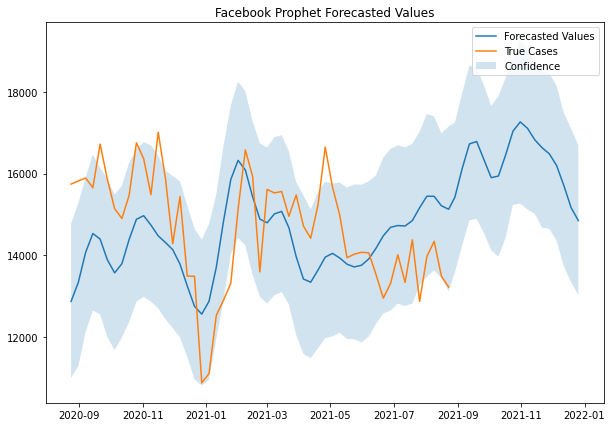


 The "forecast" DataFrame 



,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-07,15724.931126,13046.321640,16797.492147,15724.931126,15724.931126,-932.903398,-932.903398,-932.903398,-932.903398,-932.903398,-932.903398,0.0,0.0,0.0,14792.027728
1,2019-01-14,15630.397937,13663.574706,17648.221920,15630.397937,15630.397937,1.190966,1.190966,1.190966,1.190966,1.190966,1.190966,0.0,0.0,0.0,15631.588902
2,2019-01-21,15535.864747,14668.443482,18554.012096,15535.864747,15535.864747,1103.532525,1103.532525,1103.532525,1103.532525,1103.532525,1103.532525,0.0,0.0,0.0,16639.397272
3,2019-01-28,15441.331558,15513.791181,19215.077647,15441.331558,15441.331558,1922.531475,1922.531475,1922.531475,1922.531475,1922.531475,1922.531475,0.0,0.0,0.0,17363.863033
4,2019-02-04,15346.798368,15500.590138,19222.374532,15346.798368,15346.798368,2091.447866,2091.447866,2091.447866,2091.447866,2091.447866,2091.447866,0.0,0.0,0.0,17438.246234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,2021-11-28,16078.802028,14640.341030,18454.464151,15957.820362,16179.327963,404.246432,404.246432,404.246432,404.246432,404.246432,404.246432,0.0,0.0,0.0,16483.048460
152,2021-12-05,16122.489020,14357.737869,18150.034216,15987.768582,16236.024591,74.882433,74.882433,74.882433,74.882433,74.882433,74.882433,0.0,0.0,0.0,16197.371453
153,2021-12-12,16166.176012,13725.327262,17482.202506,16016.590757,16295.780066,-459.057352,-459.057352,-459.057352,-459.057352,-459.057352,-459.057352,0.0,0.0,0.0,15707.118660
154,2021-12-19,16209.863004,13338.549101,17104.509368,16045.603830,16353.915690,-1045.479781,-1045.479781,-1045.479781,-1045.479781,-1045.479781,-1045.479781,0.0,0.0,0.0,15164.383224


In [24]:
# set how many days to forecast
forecast_length = 18
# instantiate and fit the model
#m = Prophet(interval_width = .95)
m = Prophet()
m.fit(a_1)
# create the prediction dataframe 'forecast_length' days past the fit data
future = m.make_future_dataframe(periods=forecast_length, freq = 'W')
# make the forecast to the end of the 'future' dataframe
forecast = m.predict(future)

to_plot = forecast[forecast.ds > '2020-08-23'].merge(a_1, how='left')
#to_plot = forecast[:].merge(a_1, how='left')

plt.figure(figsize = (10,7))
plt.plot(to_plot['ds'], to_plot['yhat'], label='Forecasted Values')
plt.plot(to_plot['ds'], to_plot['y'], label='True Cases')
plt.fill_between(to_plot['ds'], to_plot['yhat_upper'], to_plot['yhat_lower'],
                 alpha=.2, label='Confidence')
plt.title('Facebook Prophet Forecasted Values')
plt.legend()
plt.savefig('prophet_forecast.png')
plt.show()
print('\n The "forecast" DataFrame \n')
forecast

In [25]:
future

,ds
0,2019-01-07
1,2019-01-14
2,2019-01-21
3,2019-01-28
4,2019-02-04
...,...
151,2021-11-28
152,2021-12-05
153,2021-12-12
154,2021-12-19


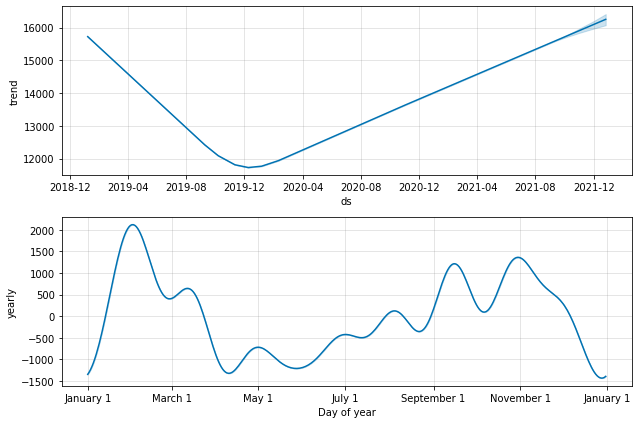

In [26]:
plot2 = m.plot_components(forecast)